In [1]:
pip install notebook pandas numpy matplotlib seaborn


  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 2: Load Dataset
df = pd.read_csv("netflix_titles.csv")

# 📌 Step 3: View Data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Check null values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Check again
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Text(0.5, 1.0, 'Top Genres on Netflix')

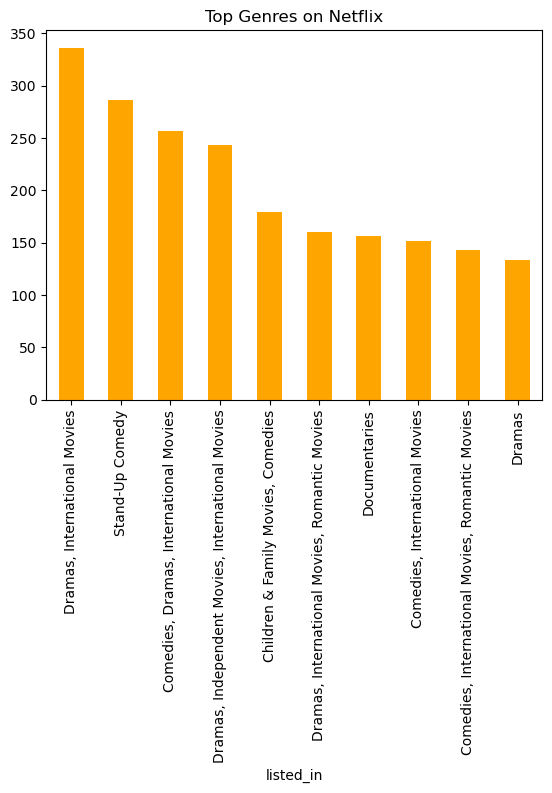

In [9]:
df['listed_in'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top Genres on Netflix')


Text(0.5, 1.0, 'Top 10 Years of Releases')

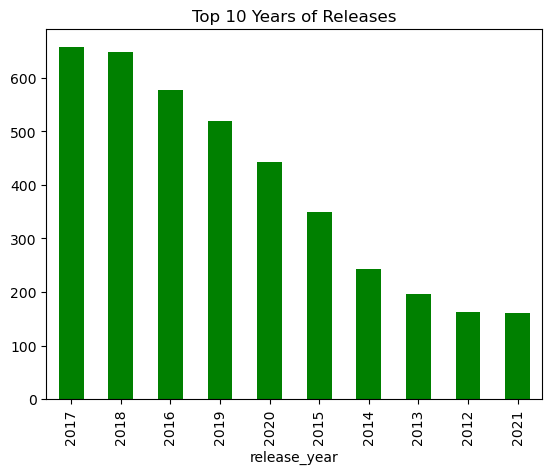

In [11]:
df['release_year'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Years of Releases')


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7284\159509332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


<Axes: xlabel='type', ylabel='count'>

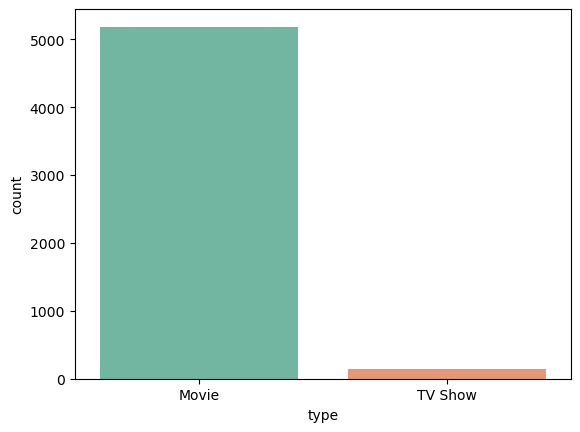

In [13]:
sns.countplot(x='type', data=df, palette='Set2')


In [15]:
df.to_csv("cleaned_netflix_data.csv", index=False)


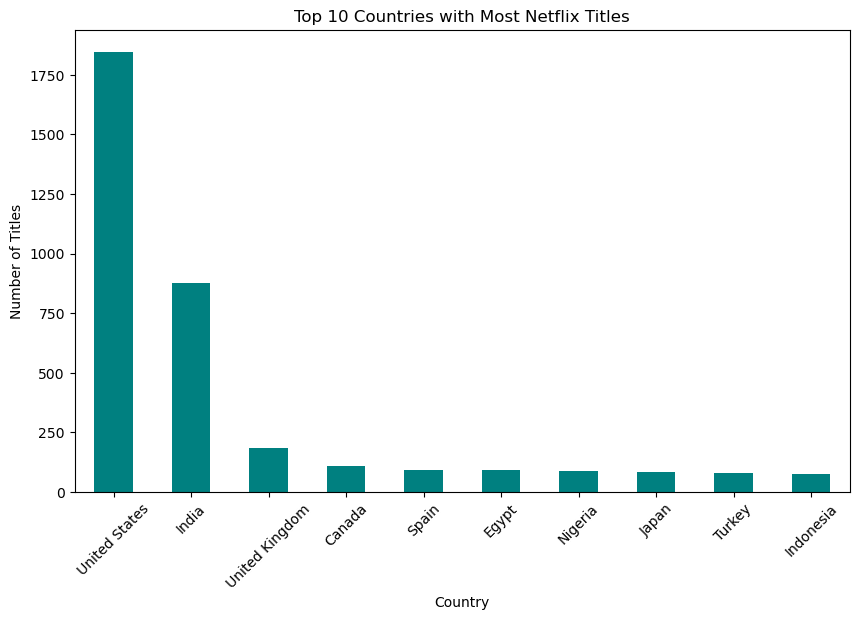

In [19]:
# Top 10 countries with most Netflix titles
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


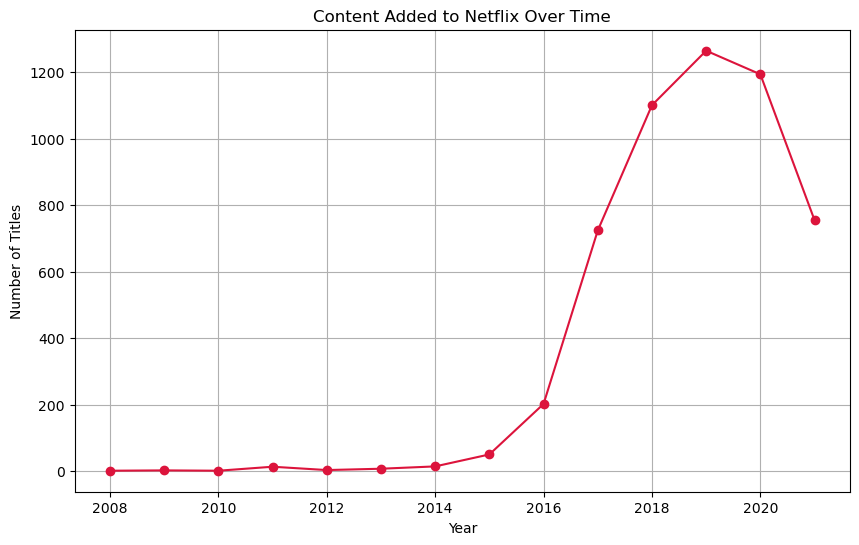

In [23]:
# Remove leading/trailing spaces and convert to datetime
df['date_added'] = df['date_added'].astype(str).str.strip()  # Remove spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert, skip errors

# Extract year
df['year_added'] = df['date_added'].dt.year

# Drop rows where conversion failed (if needed)
df.dropna(subset=['year_added'], inplace=True)

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='crimson')
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


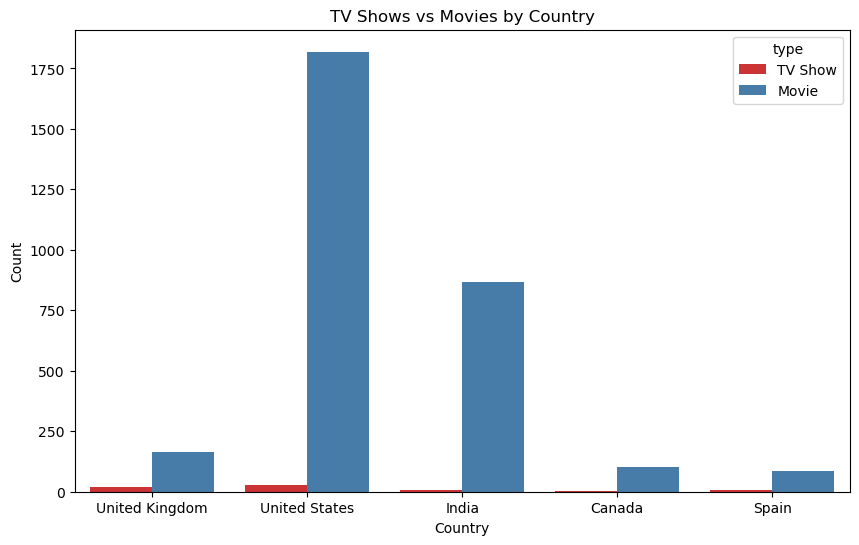

In [25]:
#tv shows vs movies by countries(top 5 countries only)
top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top, x='country', hue='type', palette='Set1')
plt.title('TV Shows vs Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7284\26553144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_mins'] = movies_df['duration'].str.replace(' min', '').astype(int)


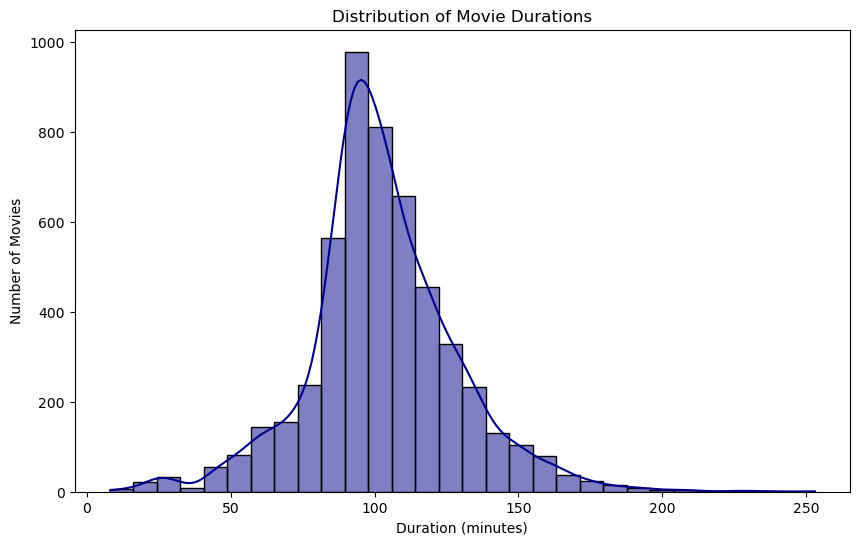

In [27]:
#distribution of duration for movies
# Filter only Movies
movies_df = df[df['type'] == 'Movie']

# Remove 'min' and convert duration to int
movies_df['duration_mins'] = movies_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10,6))
sns.histplot(movies_df['duration_mins'], bins=30, color='darkblue', kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


In [29]:
plt.savefig("movie_duration_dist.png")


<Figure size 640x480 with 0 Axes>